# Authenticating With Google Drive


In [1]:
!pip install -U -q pyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

    100% |████████████████████████████████| 993kB 21.0MB/s 


In [0]:
#authenticate
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Importing Dependencies.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#Loading the Datasets from Google Drive

In [0]:
train_downloaded = drive.CreateFile({'id':'1zBZDF5jcG2PtUVisT33sihl2u0CEJClc'})
train_downloaded.GetContentFile('train.csv')
test_downloaded = drive.CreateFile({'id':'1OsLQL-95ZuISVkgvsW5h0WxEv3LzcsVK'})
test_downloaded.GetContentFile('test.csv')

In [5]:
df_train=pd.read_csv('train.csv')
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


# Getting Information about the features

In [7]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000
mean,1.535,1.665,-73.973,40.751,-73.973,40.752,959.492
std,0.499,1.314,0.071,0.033,0.071,0.036,5237.432
min,1.000,0.000,-121.933,34.360,-121.933,32.181,1.000
25%,1.000,1.000,-73.992,40.737,-73.991,40.736,397.000
50%,2.000,1.000,-73.982,40.754,-73.980,40.755,662.000
75%,2.000,2.000,-73.967,40.768,-73.963,40.770,1075.000
max,2.000,9.000,-61.336,51.881,-61.336,43.921,3526282.000


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


# Filtering out the Outliers in our dataset (Data Cleaning)

In [0]:
m=np.mean(df_train['trip_duration'])
s= np.std(df_train['trip_duration'])
df_train=df_train[df_train['trip_duration']<=m+2*s]
df_train=df_train[df_train['trip_duration']>=m-2*s]

In [0]:
df_train = df_train[df_train['pickup_longitude']<=-73.75]
df_train = df_train[df_train['pickup_longitude']>=-74.03]
df_train = df_train[df_train['pickup_latitude']<=40.85]
df_train = df_train[df_train['pickup_latitude']>=40.63]
df_train = df_train[df_train['dropoff_longitude']<=-73.75]
df_train = df_train[df_train['dropoff_longitude']>=-74.03]
df_train = df_train[df_train['dropoff_latitude']<=40.85]
df_train = df_train[df_train['dropoff_latitude']>=40.63]


# Preprocessing

In [0]:
df_train['pickup_datetime']=pd.to_datetime(df_train.pickup_datetime)
df_test['pickup_datetime']=pd.to_datetime(df_test.pickup_datetime)
df_train.loc[:,'pickup_date'] = df_train['pickup_datetime'].dt.date
df_test.loc[:,'pickup_date'] = df_test['pickup_datetime'].dt.date
df_train['dropoff_datetime']=pd.to_datetime(df_train.dropoff_datetime)

# Getting idea for the dataset

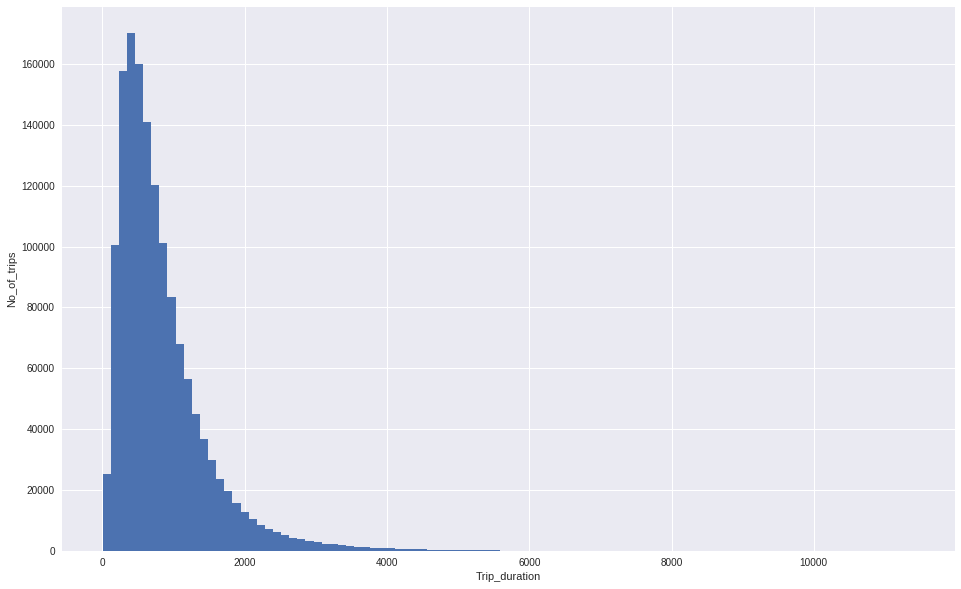

In [12]:
plt.rcParams['figure.figsize'] = [16, 10]
plt.hist(df_train['trip_duration'].values,bins=100)
plt.xlabel('Trip_duration')
plt.ylabel('No_of_trips')
plt.show()


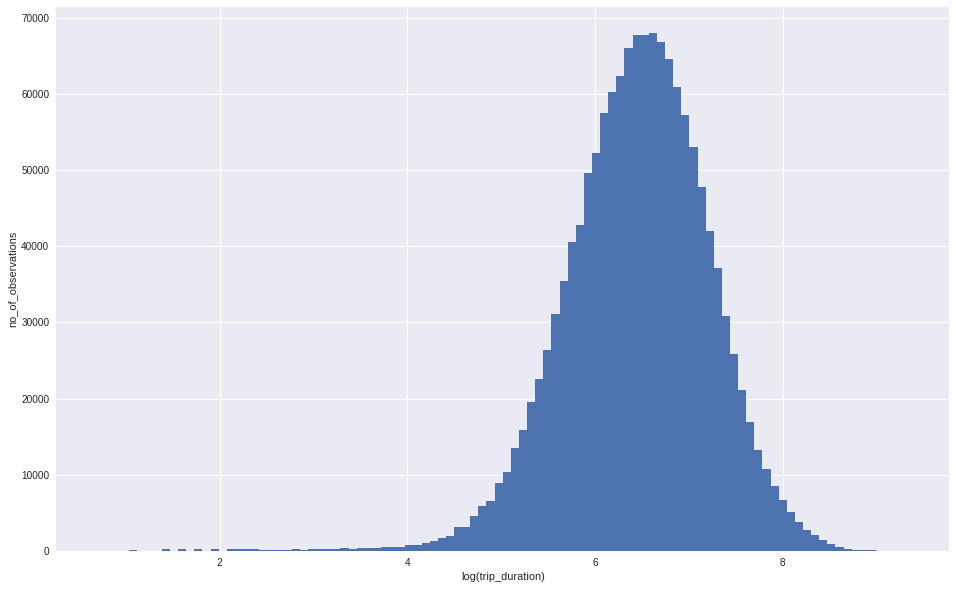

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


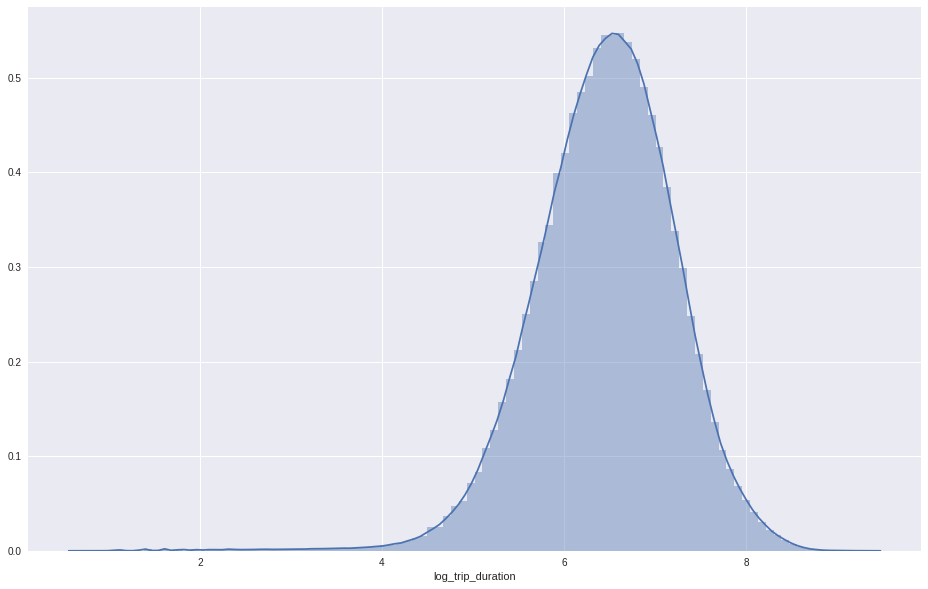

In [13]:
df_train['log_trip_duration']=np.log(df_train['trip_duration'].values+1)
plt.hist(df_train['log_trip_duration'].values , bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('no_of_observations')
plt.show()
sns.distplot(df_train['log_trip_duration'],bins=100)

# Comparing and visualising training and test data

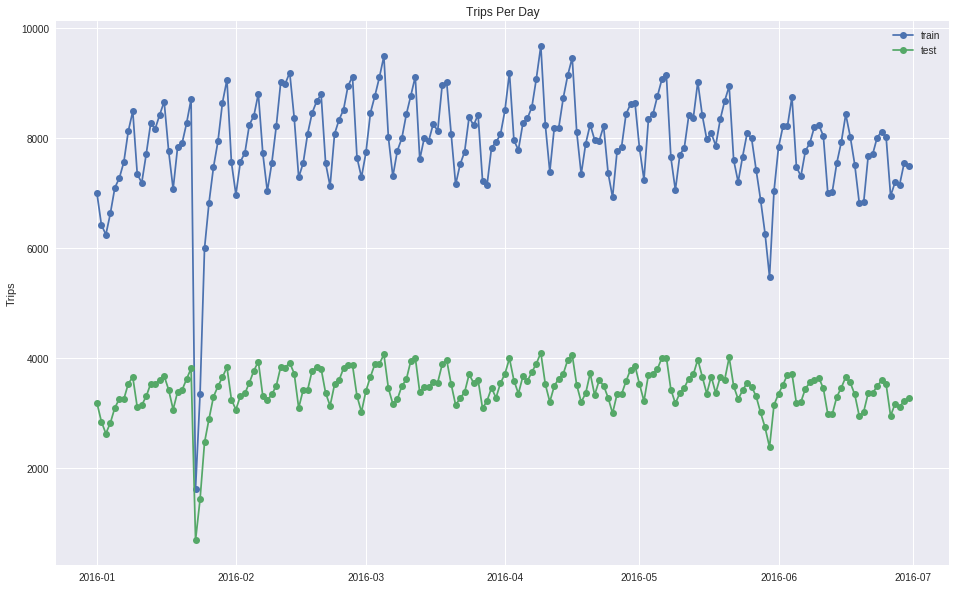

In [14]:
plt.plot(df_train.groupby('pickup_date').count()[['id']], '-o',label = 'train')
plt.plot(df_test.groupby('pickup_date').count()[['id']] , '-o' ,label = 'test')
plt.title('Trips Per Day')
plt.legend(loc=1)
plt.ylabel('Trips')
plt.show()

vendor_id
1   818.627
2   829.484
Name: trip_duration, dtype: float64


Text(0, 0.5, 'Time in Seconds')

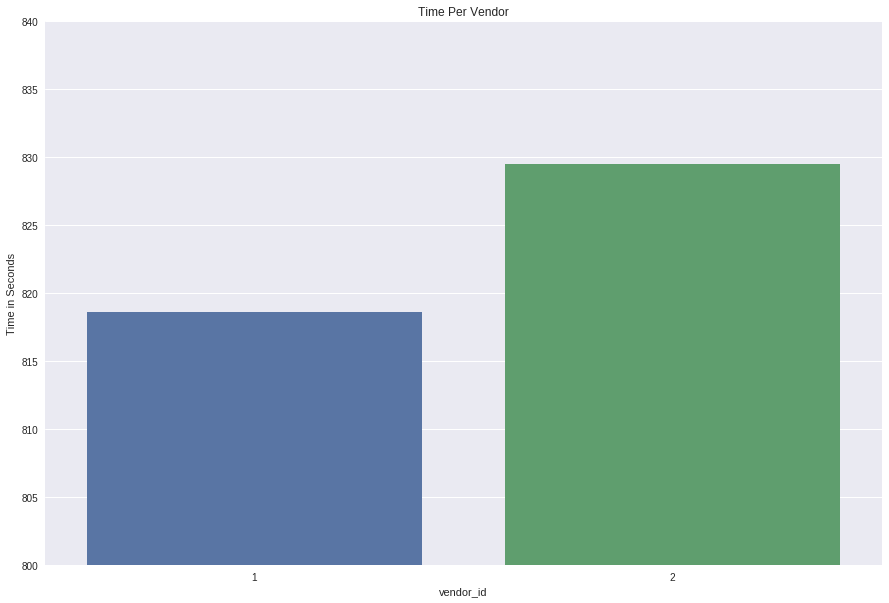

In [15]:
import warnings
warnings.filterwarnings('ignore')
plot_vendor=df_train.groupby('vendor_id')['trip_duration'].mean()
print(plot_vendor)
plt.subplots(1,1,figsize=(15,10))
plt.ylim(ymin=800)
plt.ylim(ymax = 840)
sns.barplot(plot_vendor.index,plot_vendor.values)
plt.title('Time Per Vendor')
#plt.legend(loc=1)
plt.ylabel('Time in Seconds')

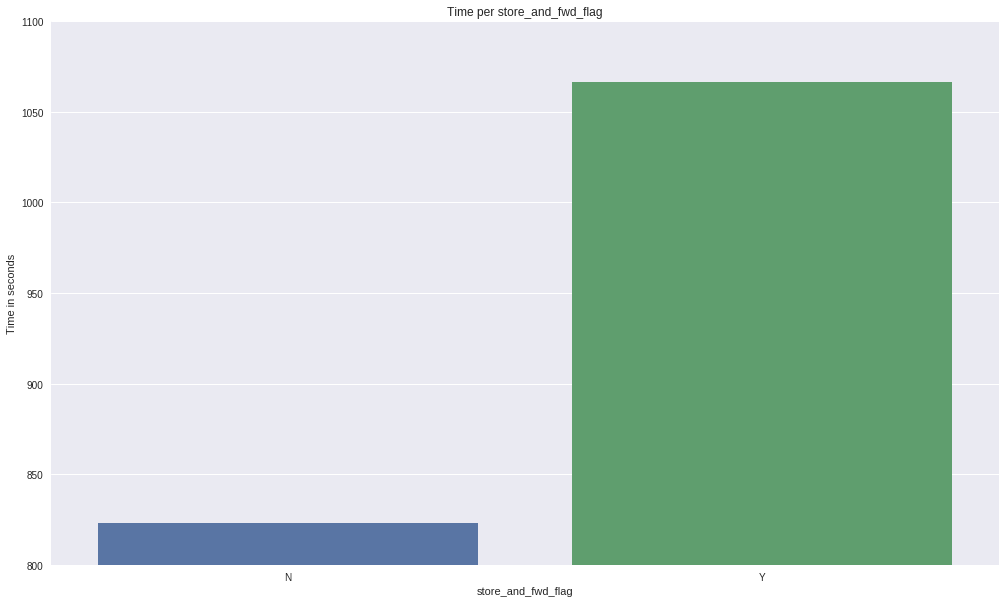

In [16]:
snwflag=df_train.groupby('store_and_fwd_flag')['trip_duration'].mean()
plt.subplots(1,1,figsize=(17,10))
plt.ylim(ymin=800)
plt.ylim(ymax=1100)
plt.title('Time per store_and_fwd_flag')
plt.ylabel('Time in seconds')
sns.barplot(snwflag.index,snwflag.values)

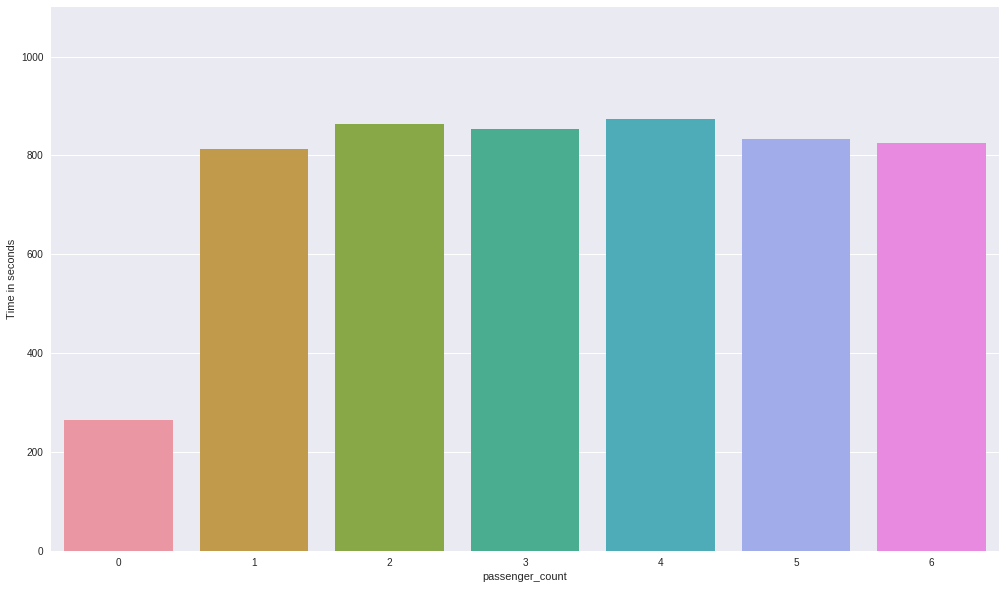

In [17]:
pc = df_train.groupby('passenger_count')['trip_duration'].mean()
plt.subplots(1,1,figsize=(17,10))
plt.ylabel('Time in seconds')

plt.ylim(ymax = 1100)
sns.barplot(pc.index,pc.values)

In [18]:
df_train.groupby('passenger_count').size()

passenger_count
0         52
1    1018715
2     206864
3      58989
4      27957
5      76912
6      47639
dtype: int64

In [19]:
df_test.groupby('passenger_count').size()

passenger_count
0        23
1    443447
2     90027
3     25686
4     12017
5     33411
6     20521
9         2
dtype: int64

No handles with labels found to put in legend.
No handles with labels found to put in legend.


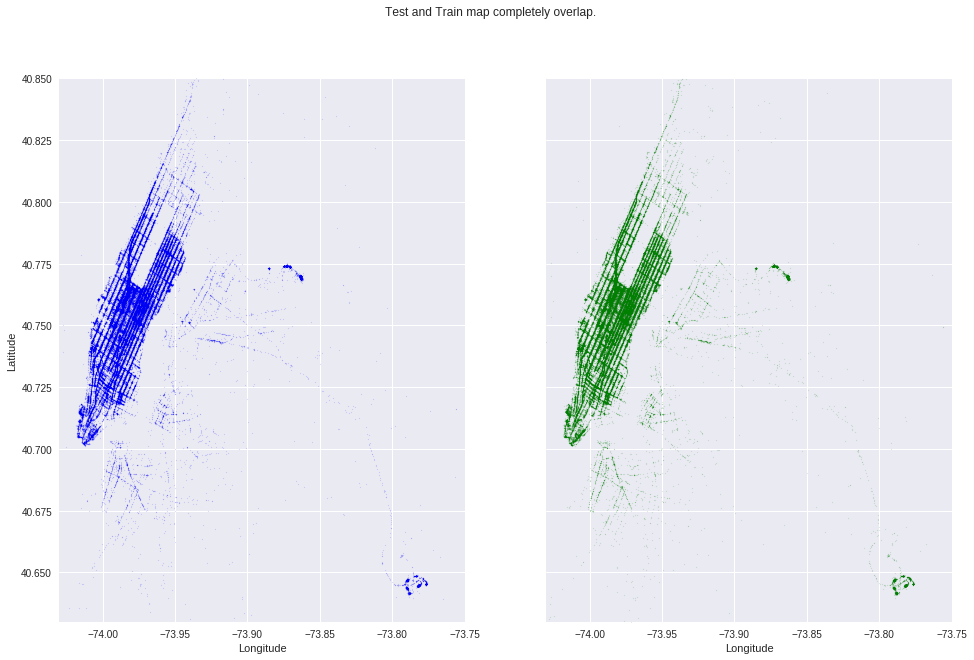

In [20]:
city_lat_border = (40.63,40.85)
city_long_border = (-74.03,-73.75)
fig,ax = plt.subplots(ncols=2,sharex=True,sharey=True)
ax[0].scatter(df_train['pickup_longitude'].values[:100000],df_train['pickup_latitude'].values[:100000],color='blue',s=1,alpha=0.1)
ax[1].scatter(df_test['pickup_longitude'].values[:100000],df_test['pickup_latitude'].values[:100000],color='green',s=1,alpha=0.1)
fig.suptitle('Test and Train map completely overlap.')
ax[0].legend(loc=0)
ax[0].set_xlabel('Longitude')
ax[1].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[1].legend(loc=0)
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.show()

In [0]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [0]:
df_train.loc[:, 'distance_haversine'] = haversine_array(df_train['pickup_latitude'].values, df_train['pickup_longitude'].values, df_train['dropoff_latitude'].values, df_train['dropoff_longitude'].values)
df_test.loc[:, 'distance_haversine'] = haversine_array(df_test['pickup_latitude'].values, df_test['pickup_longitude'].values, df_test['dropoff_latitude'].values, df_test['dropoff_longitude'].values)    
    
df_train.loc[:, 'distance_dummy_manhattan'] =  dummy_manhattan_distance(df_train['pickup_latitude'].values, df_train['pickup_longitude'].values, df_train['dropoff_latitude'].values, df_train['dropoff_longitude'].values)
df_test.loc[:, 'distance_dummy_manhattan'] =  dummy_manhattan_distance(df_test['pickup_latitude'].values, df_test['pickup_longitude'].values, df_test['dropoff_latitude'].values, df_test['dropoff_longitude'].values)

df_train.loc[:, 'direction'] = bearing_array(df_train['pickup_latitude'].values, df_train['pickup_longitude'].values, df_train['dropoff_latitude'].values, df_train['dropoff_longitude'].values)
df_test.loc[:, 'direction'] = bearing_array(df_test['pickup_latitude'].values, df_test['pickup_longitude'].values, df_test['dropoff_latitude'].values, df_test['dropoff_longitude'].values)

In [23]:
coords = np.vstack((df_train[['pickup_latitude', 'pickup_longitude']].values,
                    df_train[['dropoff_latitude', 'dropoff_longitude']].values))
print(coords)

[[ 40.76793671 -73.98215485]
 [ 40.73856354 -73.98041534]
 [ 40.7639389  -73.97902679]
 ...
 [ 40.70737076 -74.00443268]
 [ 40.75710678 -73.97463226]
 [ 40.79058456 -73.97280884]]


In [0]:
from sklearn.cluster import MiniBatchKMeans
sample_ind = np.random.permutation(len(coords))[:500000]
kmeans = MiniBatchKMeans(n_clusters=100, batch_size=10000).fit(coords[sample_ind])



In [0]:
df_train.loc[:, 'pickup_cluster'] = kmeans.predict(df_train[['pickup_latitude', 'pickup_longitude']])
df_train.loc[:, 'dropoff_cluster'] = kmeans.predict(df_train[['dropoff_latitude', 'dropoff_longitude']])
df_test.loc[:, 'pickup_cluster'] = kmeans.predict(df_test[['pickup_latitude', 'pickup_longitude']])
df_test.loc[:, 'dropoff_cluster'] = kmeans.predict(df_test[['dropoff_latitude', 'dropoff_longitude']])

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1437128 entries, 0 to 1458643
Data columns (total 18 columns):
id                          1437128 non-null object
vendor_id                   1437128 non-null int64
pickup_datetime             1437128 non-null datetime64[ns]
dropoff_datetime            1437128 non-null datetime64[ns]
passenger_count             1437128 non-null int64
pickup_longitude            1437128 non-null float64
pickup_latitude             1437128 non-null float64
dropoff_longitude           1437128 non-null float64
dropoff_latitude            1437128 non-null float64
store_and_fwd_flag          1437128 non-null object
trip_duration               1437128 non-null int64
pickup_date                 1437128 non-null object
log_trip_duration           1437128 non-null float64
distance_haversine          1437128 non-null float64
distance_dummy_manhattan    1437128 non-null float64
direction                   1437128 non-null float64
pickup_cluster              143712

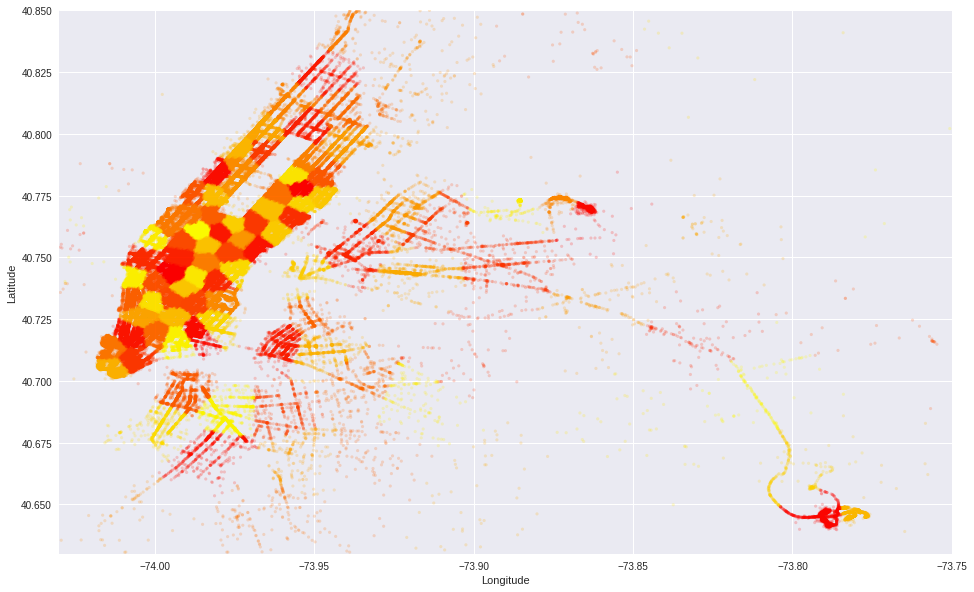

In [27]:
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(df_train.pickup_longitude.values[:500000], df_train.pickup_latitude.values[:500000], s=10, lw=0,
           c=df_train.pickup_cluster[:500000].values, cmap='autumn', alpha=0.2)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [28]:
df_train['Month'] = df_train['pickup_datetime'].dt.month
df_test['Month'] = df_test['pickup_datetime'].dt.month
df_train.groupby('Month').size(),df_test.groupby('Month').size()

(Month
 1    226444
 2    235054
 3    252443
 4    247855
 5    244591
 6    230741
 dtype: int64, Month
 1     97676
 2    102314
 3    109697
 4    107432
 5    107570
 6    100445
 dtype: int64)

In [29]:
df_train['DayofMonth'] = df_train['pickup_datetime'].dt.day
df_test['DayofMonth'] = df_test['pickup_datetime'].dt.day
len(df_train.groupby('DayofMonth').size()),len(df_test.groupby('DayofMonth').size())

(31, 31)

In [30]:
df_train['Hour']=df_train['pickup_datetime'].dt.hour
df_test['Hour']=df_test['pickup_datetime'].dt.hour
len(df_train.groupby(['Hour']).size()),len(df_test.groupby(['Hour']).size())

(24, 24)

In [31]:
df_train['Day_of_week'] = df_train['pickup_datetime'].dt.dayofweek
df_test['Day_of_week'] = df_test['pickup_datetime'].dt.dayofweek
len(df_train.groupby(['Day_of_week']).size()), len(df_train.groupby(['Day_of_week']).size())

(7, 7)

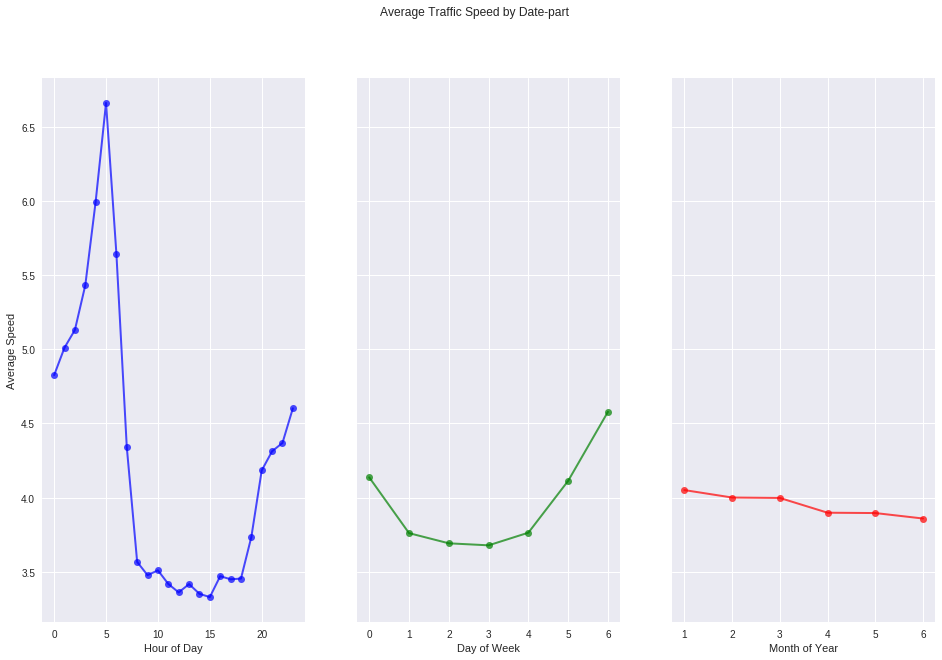

In [32]:
df_train.loc[:, 'avg_speed_h'] = 1000 * df_train['distance_haversine'] / df_train['trip_duration']
df_train.loc[:, 'avg_speed_m'] = 1000 * df_train['distance_dummy_manhattan'] / df_train['trip_duration']
fig, ax = plt.subplots(ncols=3, sharey=True)
ax[0].plot(df_train.groupby('Hour').mean()['avg_speed_h'], 'bo-', lw=2, alpha=0.7)
ax[1].plot(df_train.groupby('Day_of_week').mean()['avg_speed_h'], 'go-', lw=2, alpha=0.7)
ax[2].plot(df_train.groupby('Month').mean()['avg_speed_h'], 'ro-', lw=2, alpha=0.7)
ax[0].set_xlabel('Hour of Day')
ax[1].set_xlabel('Day of Week')
ax[2].set_xlabel('Month of Year')
ax[0].set_ylabel('Average Speed')
fig.suptitle('Average Traffic Speed by Date-part')
plt.show()

In [33]:
df_train.shape , df_test.shape
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1437128 entries, 0 to 1458643
Data columns (total 24 columns):
id                          1437128 non-null object
vendor_id                   1437128 non-null int64
pickup_datetime             1437128 non-null datetime64[ns]
dropoff_datetime            1437128 non-null datetime64[ns]
passenger_count             1437128 non-null int64
pickup_longitude            1437128 non-null float64
pickup_latitude             1437128 non-null float64
dropoff_longitude           1437128 non-null float64
dropoff_latitude            1437128 non-null float64
store_and_fwd_flag          1437128 non-null object
trip_duration               1437128 non-null int64
pickup_date                 1437128 non-null object
log_trip_duration           1437128 non-null float64
distance_haversine          1437128 non-null float64
distance_dummy_manhattan    1437128 non-null float64
direction                   1437128 non-null float64
pickup_cluster              143712

In [0]:
vendor_train = pd.get_dummies(df_train['vendor_id'], prefix='vi', prefix_sep='_')
vendor_test = pd.get_dummies(df_test['vendor_id'], prefix='vi', prefix_sep='_')
passenger_count_train = pd.get_dummies(df_train['passenger_count'], prefix='pc', prefix_sep='_')
passenger_count_test = pd.get_dummies(df_test['passenger_count'], prefix='pc', prefix_sep='_')
store_and_fwd_flag_train = pd.get_dummies(df_train['store_and_fwd_flag'], prefix='sf', prefix_sep='_')
store_and_fwd_flag_test = pd.get_dummies(df_test['store_and_fwd_flag'], prefix='sf', prefix_sep='_')
cluster_pickup_train = pd.get_dummies(df_train['pickup_cluster'], prefix='p', prefix_sep='_')
cluster_pickup_test = pd.get_dummies(df_test['pickup_cluster'], prefix='p', prefix_sep='_')
cluster_dropoff_train = pd.get_dummies(df_train['dropoff_cluster'], prefix='d', prefix_sep='_')
cluster_dropoff_test = pd.get_dummies(df_test['dropoff_cluster'], prefix='d', prefix_sep='_')

month_train = pd.get_dummies(df_train['Month'], prefix='m', prefix_sep='_')
month_test = pd.get_dummies(df_test['Month'], prefix='m', prefix_sep='_')
dom_train = pd.get_dummies(df_train['DayofMonth'], prefix='dom', prefix_sep='_')
dom_test = pd.get_dummies(df_test['DayofMonth'], prefix='dom', prefix_sep='_')
hour_train = pd.get_dummies(df_train['Hour'], prefix='h', prefix_sep='_')
hour_test = pd.get_dummies(df_test['Hour'], prefix='h', prefix_sep='_')
dow_train = pd.get_dummies(df_train['Day_of_week'], prefix='dow', prefix_sep='_')
dow_test = pd.get_dummies(df_test['Day_of_week'], prefix='dow', prefix_sep='_')

In [0]:
passenger_count_test = passenger_count_test.drop('pc_9', axis = 1)

In [0]:
df_train.loc[:, 'pickup_lat_bin'] = np.round(df_train['pickup_latitude'], 3)
df_train.loc[:, 'pickup_long_bin'] = np.round(df_train['pickup_longitude'], 3)
df_train = df_train.drop(['id','vendor_id','passenger_count','store_and_fwd_flag','Month','DayofMonth','Hour','Day_of_week',
                   'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis = 1)
Test_id = df_test['id']
df_test = df_test.drop(['id','vendor_id','passenger_count','store_and_fwd_flag','Month','DayofMonth','Hour','Day_of_week',
                   'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'], axis = 1)

df_train = df_train.drop(['dropoff_datetime','avg_speed_h','avg_speed_m','pickup_lat_bin','pickup_long_bin','trip_duration'], axis = 1)

In [37]:
df_train.shape,df_test.shape
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1437128 entries, 0 to 1458643
Data columns (total 8 columns):
pickup_datetime             1437128 non-null datetime64[ns]
pickup_date                 1437128 non-null object
log_trip_duration           1437128 non-null float64
distance_haversine          1437128 non-null float64
distance_dummy_manhattan    1437128 non-null float64
direction                   1437128 non-null float64
pickup_cluster              1437128 non-null int32
dropoff_cluster             1437128 non-null int32
dtypes: datetime64[ns](1), float64(4), int32(2), object(1)
memory usage: 87.7+ MB


In [0]:
df_train.reset_index(drop=True, inplace=True)
vendor_train.reset_index(drop=True, inplace=True)
passenger_count_train.reset_index(drop=True, inplace=True)
store_and_fwd_flag_train.reset_index(drop=True, inplace=True)
cluster_pickup_train.reset_index(drop=True, inplace=True)
cluster_dropoff_train.reset_index(drop=True, inplace=True)
month_train.reset_index(drop=True, inplace=True)
dom_train.reset_index(drop=True, inplace=True)
hour_test.reset_index(drop=True, inplace=True)
dow_train.reset_index(drop=True, inplace=True)
Train_Master = pd.concat([df_train,
                          vendor_train,
                          passenger_count_train,
                          store_and_fwd_flag_train,
                          cluster_pickup_train,
                          cluster_dropoff_train,
                         month_train,
                         dom_train,
                          hour_test,
                          dow_train
                         ], axis=1)

In [0]:
df_test.reset_index(drop=True, inplace=True)
vendor_test.reset_index(drop=True, inplace=True)
passenger_count_test.reset_index(drop=True, inplace=True)
store_and_fwd_flag_test.reset_index(drop=True, inplace=True)
cluster_pickup_test.reset_index(drop=True, inplace=True)
cluster_dropoff_test.reset_index(drop=True, inplace=True)
month_test.reset_index(drop=True, inplace=True)
dom_test.reset_index(drop=True, inplace=True)
hour_test.reset_index(drop=True, inplace=True)
dow_test.reset_index(drop=True, inplace=True)
Test_master = pd.concat([df_test, 
                         vendor_test,
                         passenger_count_test,
                         store_and_fwd_flag_test,
                         cluster_pickup_test,
                         cluster_dropoff_test,
                         month_test,
                         dom_test,
                          hour_test,
                          dow_test], axis=1)

In [0]:
Train_Master.shape,Test_master.shape
Train_Master = Train_Master.drop(['pickup_datetime','pickup_date'],axis = 1)
Test_master = Test_master.drop(['pickup_datetime','pickup_date'],axis = 1)

In [41]:

Train_Master.dropna(how='any')
Test_master.dropna(how='any')

,distance_haversine,distance_dummy_manhattan,direction,pickup_cluster,dropoff_cluster,vi_1,vi_2,pc_0,pc_1,pc_2,...,h_21,h_22,h_23,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6
0,2.746,2.913,-3.595,27,29,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,2.759,3.105,172.279,25,44,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,1.306,1.846,133.326,31,27,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,5.269,7.163,-150.957,82,27,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,0.961,1.354,130.260,22,78,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
5,4.186,4.995,12.530,13,5,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
6,3.513,4.940,140.985,16,69,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
7,2.981,4.211,47.864,68,4,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
8,18.852,25.925,31.368,28,32,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
9,1.820,2.564,39.931,13,9,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [42]:
from sklearn.model_selection import train_test_split
Train, Test = train_test_split(Train_Master[0:100000], test_size = 0.2)

Train.dropna(how='any')
Test.dropna(how='any')
Train.shape,Test.shape

((80000, 285), (20000, 285))

In [0]:
X_train = Train.drop(['log_trip_duration'], axis=1)
Y_train = Train["log_trip_duration"]
X_test = Test.drop(['log_trip_duration'], axis=1)
Y_test = Test["log_trip_duration"]
Y_test = Y_test.reset_index().drop('index',axis = 1)
Y_train = Y_train.reset_index().drop('index',axis = 1)
#print(Y_test)

#print(Y_test)

In [44]:

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge,BayesianRidge
dtrain = xgb.DMatrix(X_train, label=Y_train)
dvalid = xgb.DMatrix(X_test, label=Y_test)
dtest = xgb.DMatrix(Test_master)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
xgb_pars = {'min_child_weight': 1, 'eta': 0.5, 'colsample_bytree': 0.9, 
            'max_depth': 6,
'subsample': 0.9, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
'eval_metric': 'rmse', 'objective': 'reg:linear'}
model = xgb.train(xgb_pars, dtrain, 10, watchlist, early_stopping_rounds=2,
      maximize=False, verbose_eval=1)
print('Modeling RMSLE %.5f' % model.best_score)

[0]	train-rmse:3.02574	valid-rmse:3.02804
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 2 rounds.
[1]	train-rmse:1.56228	valid-rmse:1.56635
[2]	train-rmse:0.869022	valid-rmse:0.876125
[3]	train-rmse:0.575563	valid-rmse:0.585306
[4]	train-rmse:0.471535	valid-rmse:0.484479
[5]	train-rmse:0.43911	valid-rmse:0.45347
[6]	train-rmse:0.428202	valid-rmse:0.443602
[7]	train-rmse:0.42042	valid-rmse:0.43689
[8]	train-rmse:0.416448	valid-rmse:0.435866
[9]	train-rmse:0.413902	valid-rmse:0.43431
Modeling RMSLE 0.43431


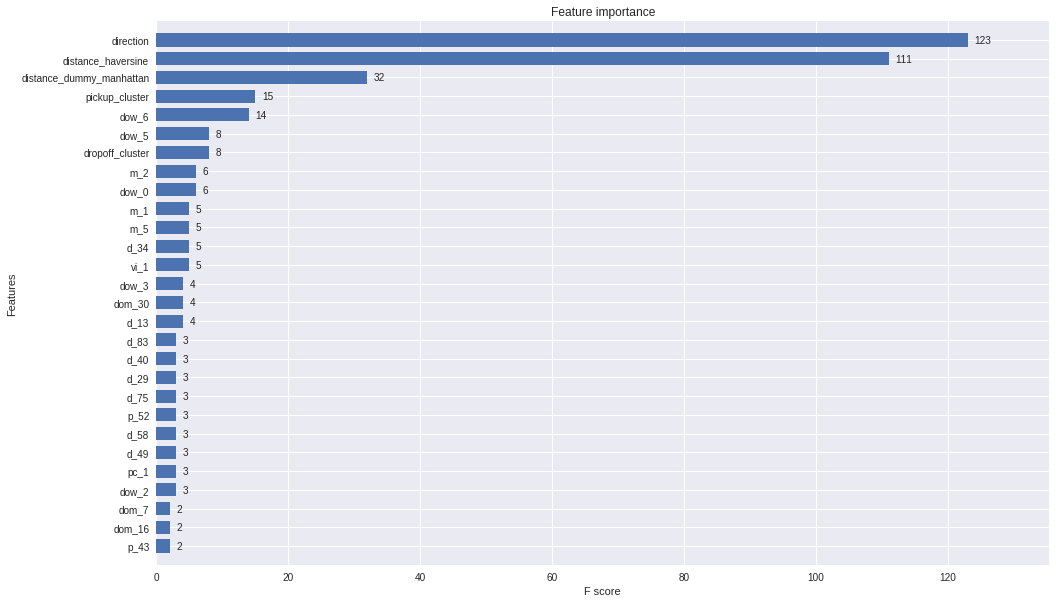

In [45]:
xgb.plot_importance(model, max_num_features=28, height=0.7)

In [0]:
pred = model.predict(dtest)
pred = np.exp(pred) - 1

In [47]:
print(pred)

[ 986.6393   948.1144   501.45605 ... 1411.7966  2299.9194  1286.6621 ]
